In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import seaborn as sns
from pylab import rcParams

## Считывание данных

In [2]:
data = pd.read_csv('../../data/dielectron.csv')
data.sample(n=5)

Run       Event         E1       px1         py1        pz1  \
85961  147926   276646963  124.68400 -13.377800 -22.278000  121.94600   
38542  147114   424310011    4.24980  -3.849670  -0.656464   -1.67628   
18578  149181  1365751886    2.66816   0.557392  -2.060100   -1.60137   
27513  149181  1769133214   11.33570  -2.427900   3.283220  -10.57470   
11405  146644   835382503    7.26149  -4.192630  -0.823803   -5.87132   

            pt1      eta1     phi1  Q1       E2       px2       py2      pz2  \
85961  25.98610  2.250330 -2.11158   1  16.6078  -2.53402  -3.31533  16.0750   
38542   3.90524 -0.417043 -2.97269  -1  19.8770  15.31470  -7.21384 -10.4171   
18578   2.13418 -0.693423 -1.30656  -1  65.3214   1.48298 -14.74390  63.6184   
27513   4.08341 -1.680030  2.20754   1  68.3808  -9.98326  11.32240 -66.6938   
11405   4.27280 -1.122850 -2.94758  -1  73.3134   8.62217   8.25676 -72.3350   

            pt2      eta2      phi2  Q2         M  
85961   4.17285  2.058250 -2.223410   1   2.31712  
38542  16.92870 -0.581944 -0.440212   1  15.57130  
18578  14.81830  2.163480 -1.470550   1  22.13430  
27513  15.09510 -2.191450  2.293420   1   4.11478  
11405  11.93800 -2.501470  0.763752   1  17.35590

## Предобработка данных
Рассмотрим данные:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


В данных присутствуют 85 пустых значений массы. Удалим их и обрежем явно ненужные параметры (Run, Event):

In [4]:
data = data.drop(['Run', 'Event'], axis=1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99915 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      99915 non-null  float64
 1   px1     99915 non-null  float64
 2   py1     99915 non-null  float64
 3   pz1     99915 non-null  float64
 4   pt1     99915 non-null  float64
 5   eta1    99915 non-null  float64
 6   phi1    99915 non-null  float64
 7   Q1      99915 non-null  int64  
 8   E2      99915 non-null  float64
 9   px2     99915 non-null  float64
 10  py2     99915 non-null  float64
 11  pz2     99915 non-null  float64
 12  pt2     99915 non-null  float64
 13  eta2    99915 non-null  float64
 14  phi2    99915 non-null  float64
 15  Q2      99915 non-null  int64  
 16  M       99915 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 13.7 MB


Сохраним данные в файл dielectron_preprocessed.csv:

In [5]:
data.to_csv('../../data/dielectron_preprocessed.csv', index=False)

## Визуализация и анализ данных

Выделим полезные данные, предварительно построив heatmap корреляции:

In [6]:
data = pd.read_csv('../../data/dielectron_preprocessed.csv')

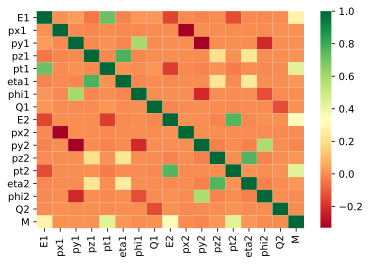

In [7]:
sns.heatmap(data.corr(), cmap='RdYlGn')
plt.show()

В целях задания необходимо построить регрессионную модель, предсказывающую инвариантную массу электронов (в ГэВ). Как видно, с массой незначительно (порядка 0.4-0.5) коррелируют энергии первого и второго электрона (E1, E2), коррелируют значения импульсов частиц (pt1, pt2). Между энергией электрона и его значением импульса (а именно transverse momentum) есть явная взаимосвязь. Можно предположить, что эта взаимосвязь вызвана зависимостью кинетической энергии и импульса, а именно: $E = \frac{p^2}{2m}$. Поскольку в значение полной энергии также входит потенциальная энергия взаимодействия, стоит учесть оба значения. Логично предположить, что инвариантная масса электронов будет зависить одновременно от энергий первого и второго электрона, а не только от одного из значений.

In [8]:
important_cols = ['E1', 'E2', 'pt1', 'pt2', 'M']

In [9]:
data = data[important_cols]

Рассмотрим попарные взаимосвязи:

In [10]:
sns.pairplot(data.sample(n=300))
plt.show()

Как видно, в данных есть явные аномалии - частицы с высокой энергией. Рассмотрим, сколько высокоэнергетических частиц (> 300 ГэВ) находится в данных:

In [11]:
print('E1: {}%'.format(len(data[data.E1 > 300])/len(data)*100))
print('Max E1: {} ГэВ\n'.format(data.E1.max()))
print('E2: {}%'.format(len(data[data.E2 > 300])/len(data)*100))
print('Max E2: {} ГэВ'.format(data.E2.max()))

E1: 0.09608166941900616%
Max E1: 850.602 ГэВ

E2: 0.16514036931391682%
Max E2: 948.375 ГэВ


Как видно, таких частиц немного, и каждая из них не превышает энергии 1000 ГэВ, поэтому они не должны сказаться на итоговом качестве модели.